In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
import datetime

In [2]:
def condensated_array(x):
    temp = [x[0]]
    for i in range(1, len(x)-1):
        if x[i] != x[i-1]:
            temp.append(x[i])
    return temp

In [3]:
df07 = pd.read_csv("Dataset_SAMUR_2017.csv")
df08 = pd.read_csv("Dataset_SAMUR_2018.csv")
df09 = pd.read_csv("Dataset_SAMUR_2019.csv")
df07.drop(["Unnamed: 0"],axis =1,inplace=True)
df08.drop(["Unnamed: 0"],axis =1,inplace=True)
df09.drop(["Unnamed: 0"],axis =1,inplace=True)

In [4]:
df07

,Año,Mes,Código,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido
0,2017,ENERO,Heridas,CENTRO,Concepción (Fund. J. Díaz),False,2017-01-01 00:23:19,2017-01-01 00:28:59,6,0 days 00:05:40
1,2017,ENERO,Agresión sin especificar,CARABANCHEL,No derivado,False,2017-01-01 00:27:35,2017-01-01 00:35:44,6,0 days 00:08:09
2,2017,ENERO,Intoxicación etílica,SALAMANCA,No derivado,False,2017-01-01 00:47:26,2017-01-01 00:55:49,6,0 days 00:08:23
3,2017,ENERO,Agresión sin especificar,CENTRO,Doce de Octubre,False,2017-01-01 00:55:13,2017-01-01 01:02:23,6,0 days 00:07:10
4,2017,ENERO,Accidente menos de 3 victimas,VILLA DE VALLECAS,No derivado,False,2017-01-01 01:07:11,2017-01-01 01:19:44,6,0 days 00:12:33
...,...,...,...,...,...,...,...,...,...,...
134392,2017,DICIEMBRE,Intoxicación etílica,VALLECAS PTE.,No derivado,False,2017-12-30 23:21:51,2017-12-30 23:24:38,5,0 days 00:02:47
134393,2017,DICIEMBRE,Orden medica,VICALVARO,Gregorio Marañón,False,2017-12-30 23:31:11,2017-12-30 23:40:52,5,0 days 00:09:41
134394,2017,DICIEMBRE,Patología respiratoria,ARGANZUELA,Concepción (Fund. J. Díaz),False,2017-12-30 23:36:33,2017-12-30 23:42:40,5,0 days 00:06:07
134395,2017,DICIEMBRE,Agresión sin especificar,VILLAVERDE,Doce de Octubre,False,2017-12-30 23:40:53,2017-12-30 23:48:13,5,0 days 00:07:20


In [5]:
study1 = df07[(df07["Mes"] == "AGOSTO") & (df07["Código"] == "Intoxicación etílica")]
study1["Solicitud"] = study1["Solicitud"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
study1["Solicitud"] = study1["Solicitud"].apply(lambda x: x.day)
study1

/home/algadoc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/algadoc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Año,Mes,Código,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido
79248,2017,AGOSTO,Intoxicación etílica,TETUAN,No derivado,False,1,2017-08-01 00:25:14,1,0 days 00:04:39
79258,2017,AGOSTO,Intoxicación etílica,MONCLOA,Concepción (Fund. J. Díaz),False,1,2017-08-01 01:05:23,1,0 days 00:04:36
79262,2017,AGOSTO,Intoxicación etílica,CENTRO,Concepción (Fund. J. Díaz),False,1,2017-08-01 01:31:49,1,0 days 00:08:33
79270,2017,AGOSTO,Intoxicación etílica,CENTRO,No derivado,False,1,2017-08-01 01:53:29,1,0 days 00:07:03
79271,2017,AGOSTO,Intoxicación etílica,MONCLOA,Concepción (Fund. J. Díaz),False,1,2017-08-01 02:06:44,1,0 days 00:05:50
...,...,...,...,...,...,...,...,...,...,...
87926,2017,AGOSTO,Intoxicación etílica,SAN BLAS,No derivado,True,30,-1,2,-1
87934,2017,AGOSTO,Intoxicación etílica,SALAMANCA,No derivado,True,30,-1,2,-1
87956,2017,AGOSTO,Intoxicación etílica,VALLECAS PTE.,No derivado,False,30,2017-08-30 22:36:00,2,0 days 00:04:10
87962,2017,AGOSTO,Intoxicación etílica,VILLAVERDE,No derivado,False,30,2017-08-30 23:00:08,2,0 days 00:08:40


30
30
30


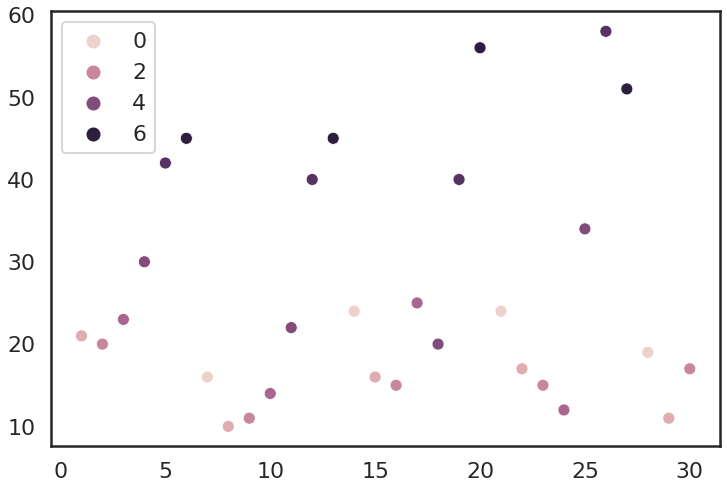

In [6]:
grapharray = study1["Solicitud"].to_numpy()
colorcategorical = condensated_array(study1["Dia de la semana"].to_numpy())
print(len(colorcategorical))
unique_elements, counts_elements = np.unique(grapharray, return_counts=True)
print(len(unique_elements))
print(len(counts_elements))
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.set(style="white", context="poster")
sns.scatterplot(unique_elements,counts_elements,colorcategorical)

In [7]:
study2 = df07[(df07["Mes"] == "DICIEMBRE") & (df07["Código"] == "Intoxicación etílica")]
study2["Solicitud"] = study2["Solicitud"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
study2["Solicitud"] = study2["Solicitud"].apply(lambda x: x.day)
study2

/home/algadoc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/algadoc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Año,Mes,Código,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido
122629,2017,DICIEMBRE,Intoxicación etílica,CENTRO,No derivado,False,1,2017-12-01 00:31:05,4,0 days 00:07:11
122634,2017,DICIEMBRE,Intoxicación etílica,CARABANCHEL,No derivado,False,1,2017-12-01 00:56:46,4,0 days 00:06:46
122637,2017,DICIEMBRE,Intoxicación etílica,MONCLOA,No derivado,False,1,2017-12-01 01:02:42,4,0 days 00:03:38
122639,2017,DICIEMBRE,Intoxicación etílica,CENTRO,Concepción (Fund. J. Díaz),False,1,2017-12-01 01:18:29,4,0 days 00:05:21
122643,2017,DICIEMBRE,Intoxicación etílica,VALLECAS PTE.,No derivado,False,1,2017-12-01 01:33:19,4,0 days 00:07:11
...,...,...,...,...,...,...,...,...,...,...
134366,2017,DICIEMBRE,Intoxicación etílica,LATINA,No derivado,False,30,2017-12-30 21:59:31,5,0 days 00:03:24
134374,2017,DICIEMBRE,Intoxicación etílica,VALLECAS PTE.,No derivado,False,30,2017-12-30 22:23:21,5,0 days 00:07:26
134375,2017,DICIEMBRE,Intoxicación etílica,ARGANZUELA,No derivado,False,30,2017-12-30 22:23:49,5,0 days 00:07:32
134391,2017,DICIEMBRE,Intoxicación etílica,VALLECAS PTE.,No derivado,True,30,-1,5,-1


30
30
30


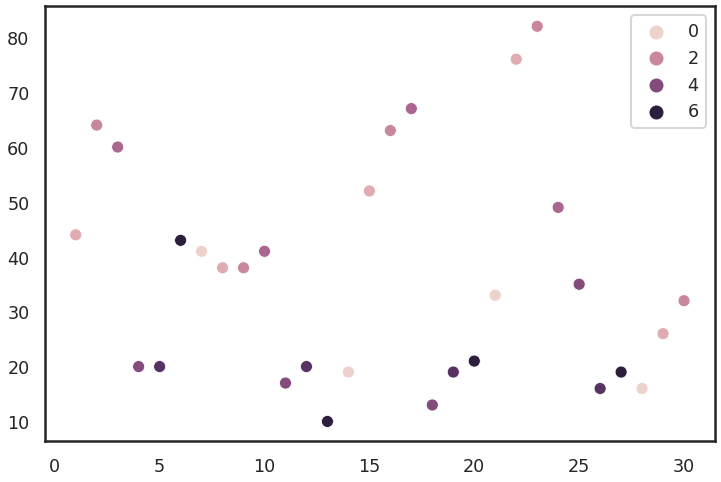

In [8]:
grapharray = study2["Solicitud"].to_numpy()
colorcategorical = condensated_array(study1["Dia de la semana"].to_numpy())
print(len(colorcategorical))
unique_elements, counts_elements = np.unique(grapharray, return_counts=True)
print(len(unique_elements))
print(len(counts_elements))
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.set(style="white", context="poster", font_scale = 0.8, palette = sns.color_palette("muted",7))
sns.scatterplot(unique_elements,counts_elements,colorcategorical)

In [9]:
study3 = pd.concat([df07,df08,df09])

In [10]:
study3

,Año,Mes,Código,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido
0,2017,ENERO,Heridas,CENTRO,Concepción (Fund. J. Díaz),False,2017-01-01 00:23:19,2017-01-01 00:28:59,6,0 days 00:05:40
1,2017,ENERO,Agresión sin especificar,CARABANCHEL,No derivado,False,2017-01-01 00:27:35,2017-01-01 00:35:44,6,0 days 00:08:09
2,2017,ENERO,Intoxicación etílica,SALAMANCA,No derivado,False,2017-01-01 00:47:26,2017-01-01 00:55:49,6,0 days 00:08:23
3,2017,ENERO,Agresión sin especificar,CENTRO,Doce de Octubre,False,2017-01-01 00:55:13,2017-01-01 01:02:23,6,0 days 00:07:10
4,2017,ENERO,Accidente menos de 3 victimas,VILLA DE VALLECAS,No derivado,False,2017-01-01 01:07:11,2017-01-01 01:19:44,6,0 days 00:12:33
...,...,...,...,...,...,...,...,...,...,...
146775,2019,DICIEMBRE,"Casual: caída, etc",HORTALEZA,Ramón y Cajal,False,2019-12-31 23:12:54,2019-12-31 23:20:13,1,0 days 00:07:19
146776,2019,DICIEMBRE,Apertura de puerta,CHAMBERI,No derivado,False,2019-12-31 23:26:55,2019-12-31 23:31:16,1,0 days 00:04:21
146777,2019,DICIEMBRE,Intoxicación etílica,CHAMARTIN,No derivado,False,2019-12-31 23:28:26,2019-12-31 23:35:50,1,0 days 00:07:24
146778,2019,DICIEMBRE,Patología digestiva,LATINA,Central de la Defensa,False,2019-12-31 23:32:19,2019-12-31 23:37:39,1,0 days 00:05:20


In [11]:
study3["Código"].unique()

array(['Heridas', 'Agresión sin especificar', 'Intoxicación etílica',
       'Accidente menos de 3 victimas', 'Inconsciente sin filiar causa',
       'Casual: caída, etc', 'Apertura de puerta', 'Atropello',
       'Violencia de genero', 'Accidente de bicicleta',
       'Patología respiratoria', 'Patología digestiva', 'Precipitado',
       'Certificación psiquiátrico', 'Otros', 'Parada Cardiorespiratoria',
       'Arma blanca', 'Patología psicosomática',
       'Accidente de motocicleta', 'Patología urológica',
       'Patología cardiovascular',
       'Colaboración del FOXTROP en una actuación',
       'Atención psicológica a Familiares y allegados',
       'Convulsión y/o epilepsia', 'Diabético', 'Sobredosis',
       'Servicios especiales', 'Servicios de seguimiento de riesgos',
       'Incendio', 'Paciente en huelga de hambre', 'Preventivos',
       'Patología neurológica', 'Orden medica',
       'Infarto o patología coronaria', 'Patología infecciosa',
       'Incendio con Victimas c

In [12]:
study3 = study3[study3["Código"] != 'Colaboración del FOXTROP en una actuación']

In [13]:
codigos = pd.read_csv("AccidentesYGravedad.csv")

In [14]:
codigos

,Código,Nivel de emergencia
0,'Heridas',2
1,'Accidente menos de 3 victimas',4
2,"Casual: caída, etc",1
3,'Violencia de genero',2
4,'Patología respiratoria',2
...,...,...
85,'Derrumbamientos',5
86,'Heridas complicadas',4
87,'Riesgo público',5
88,'Atropello',5


In [15]:
len(study3["Código"].unique())

90

In [16]:
codigo = codigos["Código"].to_numpy().tolist()

In [17]:
gravedad = codigos["Nivel de emergencia"].to_numpy().tolist()

In [18]:
for i in range(0,len(codigo)):
    codigo[i] = codigo[i].replace("'","").strip()
codigo

['Heridas',
 'Accidente menos de 3 victimas',
 'Casual: caída, etc',
 'Violencia de genero',
 'Patología respiratoria',
 'Certificación psiquiátrico',
 'Arma blanca',
 'Accidente de motocicleta',
 'Patología cardiovascular',
 'Atención psicológica a Familiares y allegados',
 'Convulsión y/o epilepsia',
 'Servicios especiales',
 'Incendio',
 'Patología neurológica',
 'Infarto o patología coronaria',
 'Incendio con Victimas confirmadas',
 'Intoxicación por fármacos y/o productos tóxicos',
 'Accidente con 3 o más víctimas confirmadas',
 'Otras instituciones',
 'Patología anafiláctica',
 'Patología obstétrica',
 'Atención psicológica a la Víctima primaria',
 'Atrapamientos/enterramientos',
 'Policía municipal',
 'Serv. Preventivo desde oper. Ordinario',
 'NO APARECE EN CODIGO INICIAL',
 'Autolisis traumática',
 'Agresión sexual',
 'Maltrato a ancianos',
 'Arma de fuego',
 'Orden médica urgente /agresivo',
 'Autolisis no traumática',
 'Domicilio',
 'Atención psicológica a Implicados.',
 'Ar

In [19]:
nivel_de_emergencia = []
for x in study3.iterrows():
    i = codigo.index(x[1][2])
    nivel_de_emergencia.append(gravedad[i])

In [20]:
study3["Gravedad"] = nivel_de_emergencia

/home/algadoc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
study3.drop("Código",axis=1,inplace = True)

/home/algadoc/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
def array_prob(x):
    y = 0
    for i in x:
        y +=i
    z = []
    for i in x:
        z.append(i/y)
    return z

test = [2,3,6]
array_prob(test)

[0.18181818181818182, 0.2727272727272727, 0.5454545454545454]

[]

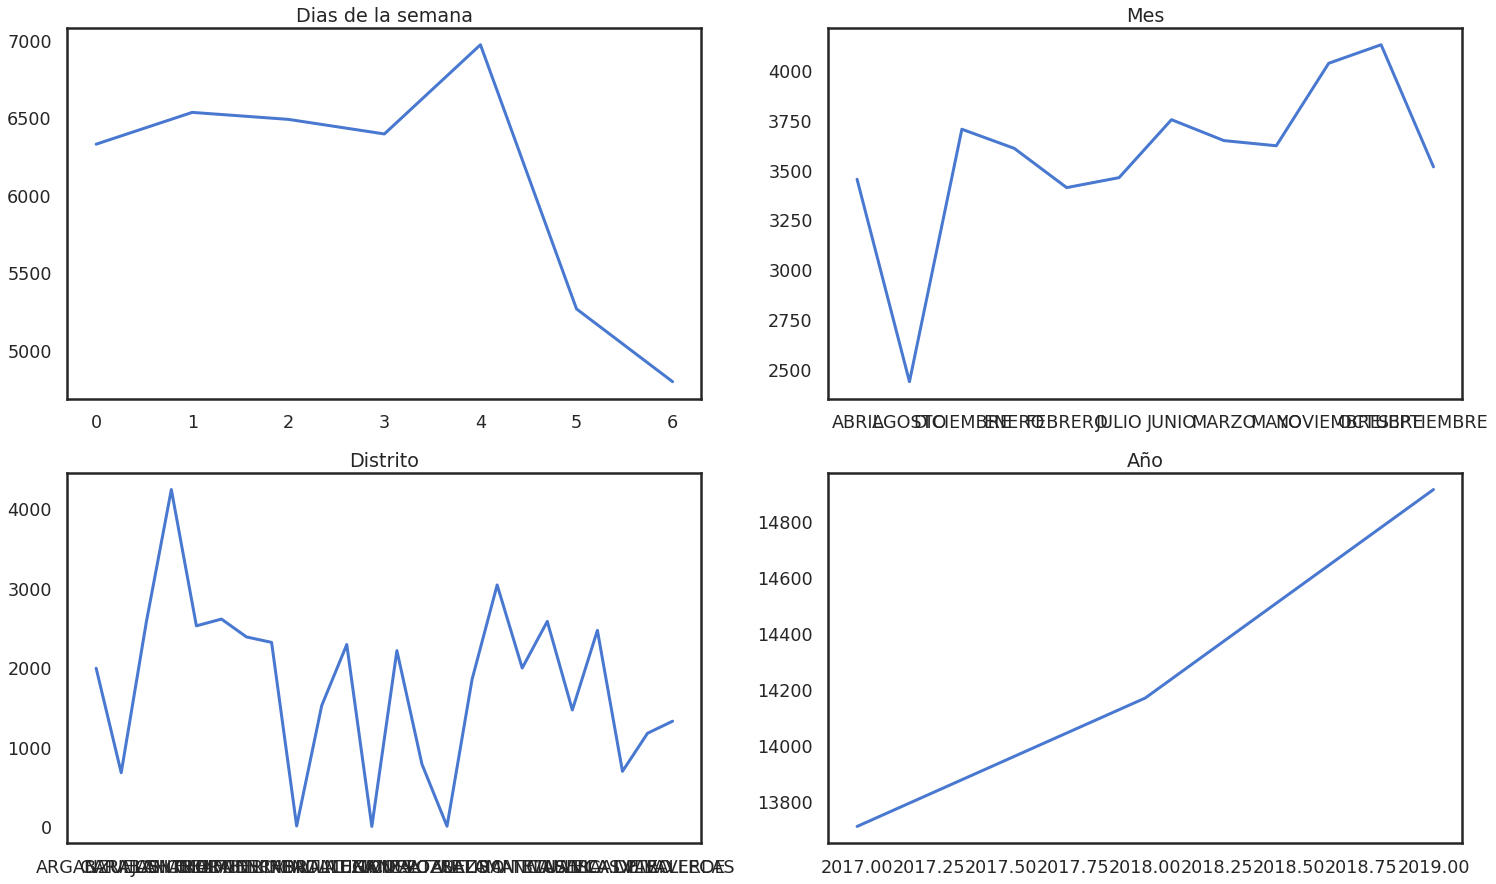

In [23]:
gravedad_target = 5

plt.figure(figsize=(25,15))
dataframe = study3[study3["Gravedad"] == gravedad_target]
unique_elements, counts_elements = np.unique(dataframe["Dia de la semana"], return_counts=True)
plt.subplot(2, 2, 1)
plt.plot(unique_elements,counts_elements)
plt.title("Dias de la semana")
unique_elements, counts_elements = np.unique(dataframe["Mes"], return_counts=True)
plt.subplot(2,2,2)
plt.plot(unique_elements,counts_elements)
plt.title("Mes")
unique_elements, counts_elements = np.unique(dataframe["Distrito"], return_counts=True)
plt.subplot(2, 2, 3)
plt.plot(unique_elements,counts_elements)
plt.title("Distrito")
unique_elements, counts_elements = np.unique(dataframe["Año"], return_counts=True)
plt.subplot(2, 2, 4)
plt.plot(unique_elements,counts_elements)
plt.title("Año")
plt.plot()

In [67]:
import copy 
study4 = copy.copy(study3)
study4["Solicitud"] = study4["Solicitud"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
#study4 = study4[(study4["Mes"] == "ENERO") & (study4["Año"] == 2017)]
study4

,Año,Mes,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido,Gravedad
0,2017,ENERO,CENTRO,Concepción (Fund. J. Díaz),False,2017-01-01 00:23:19,2017-01-01 00:28:59,6,0 days 00:05:40,2
1,2017,ENERO,CARABANCHEL,No derivado,False,2017-01-01 00:27:35,2017-01-01 00:35:44,6,0 days 00:08:09,3
2,2017,ENERO,SALAMANCA,No derivado,False,2017-01-01 00:47:26,2017-01-01 00:55:49,6,0 days 00:08:23,2
3,2017,ENERO,CENTRO,Doce de Octubre,False,2017-01-01 00:55:13,2017-01-01 01:02:23,6,0 days 00:07:10,3
4,2017,ENERO,VILLA DE VALLECAS,No derivado,False,2017-01-01 01:07:11,2017-01-01 01:19:44,6,0 days 00:12:33,4
...,...,...,...,...,...,...,...,...,...,...
146775,2019,DICIEMBRE,HORTALEZA,Ramón y Cajal,False,2019-12-31 23:12:54,2019-12-31 23:20:13,1,0 days 00:07:19,1
146776,2019,DICIEMBRE,CHAMBERI,No derivado,False,2019-12-31 23:26:55,2019-12-31 23:31:16,1,0 days 00:04:21,2
146777,2019,DICIEMBRE,CHAMARTIN,No derivado,False,2019-12-31 23:28:26,2019-12-31 23:35:50,1,0 days 00:07:24,2
146778,2019,DICIEMBRE,LATINA,Central de la Defensa,False,2019-12-31 23:32:19,2019-12-31 23:37:39,1,0 days 00:05:20,2


In [68]:
tiempos = study4["Solicitud"].to_numpy()

In [81]:
ibc = [0]

for i in range(1,len(tiempos)):
    x = tiempos[i] - tiempos[i-1]
    x = round(x.astype("int") * 0.000000001,0)
    if x < 0:
        x = -x
    if x > 80000:
        x -= 86400
    ibc.append(x)

In [82]:
max(ibc) #ibc < 24h

12587.0

In [83]:
def Average(lst): 
    return sum(lst) / len(lst) 
Average(ibc)/60 #Tiempo medio entre llamadas: 3 minutos 29.8 segundos

3.7352885006504204

In [85]:
study4["IBC"] = ibc

In [87]:
study4

,Año,Mes,Distrito,Hospital,Devuelto,Solicitud,Intervención,Dia de la semana,Tiempo de recorrido,Gravedad,IBC
0,2017,ENERO,CENTRO,Concepción (Fund. J. Díaz),False,2017-01-01 00:23:19,2017-01-01 00:28:59,6,0 days 00:05:40,2,0.0
1,2017,ENERO,CARABANCHEL,No derivado,False,2017-01-01 00:27:35,2017-01-01 00:35:44,6,0 days 00:08:09,3,256.0
2,2017,ENERO,SALAMANCA,No derivado,False,2017-01-01 00:47:26,2017-01-01 00:55:49,6,0 days 00:08:23,2,1191.0
3,2017,ENERO,CENTRO,Doce de Octubre,False,2017-01-01 00:55:13,2017-01-01 01:02:23,6,0 days 00:07:10,3,467.0
4,2017,ENERO,VILLA DE VALLECAS,No derivado,False,2017-01-01 01:07:11,2017-01-01 01:19:44,6,0 days 00:12:33,4,718.0
...,...,...,...,...,...,...,...,...,...,...,...
146775,2019,DICIEMBRE,HORTALEZA,Ramón y Cajal,False,2019-12-31 23:12:54,2019-12-31 23:20:13,1,0 days 00:07:19,1,238.0
146776,2019,DICIEMBRE,CHAMBERI,No derivado,False,2019-12-31 23:26:55,2019-12-31 23:31:16,1,0 days 00:04:21,2,841.0
146777,2019,DICIEMBRE,CHAMARTIN,No derivado,False,2019-12-31 23:28:26,2019-12-31 23:35:50,1,0 days 00:07:24,2,91.0
146778,2019,DICIEMBRE,LATINA,Central de la Defensa,False,2019-12-31 23:32:19,2019-12-31 23:37:39,1,0 days 00:05:20,2,233.0


In [89]:
study5 = study4

In [91]:
study5.to_csv("Samur_studied.csv")